¡Hola, Oscar!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Oscar! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
import seaborn as sns

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Gran trabajo con la carga de la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv(r"/datasets/megaline_users.csv")
df_plans = pd.read_csv(r"/datasets/megaline_plans.csv")
df_messages = pd.read_csv(r"/datasets/megaline_messages.csv")
df_internet = pd.read_csv(r"/datasets/megaline_internet.csv")
df_calls = pd.read_csv(r"/datasets/megaline_calls.csv")


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.head(10))


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


###### No veo ningun problema a corregir en el df de las tarifas por lo que continuo con los siguientes pasos.

## Corregir datos

###### No encontré ningún dato a corregir

## Enriquecer los datos

<div class="alert alert-block alert-info">
<b>En este análisis, es importante tener en cuenta cómo Megaline maneja la facturación del tráfico de internet. En lugar de redondear cada sesión web individual, la compañía suma el uso total de megabytes de cada usuario por mes y luego redondea hacia arriba a gigabytes completos.

Esto significa que si un usuario consume 1025 MB en un mes, se le cobrará 2 GB en lugar de 1. Si usa 2048 MB, se le cobrarán 3 GB, y así sucesivamente. Para implementar esta lógica en nuestro análisis, utilizaremos la función np.ceil() para redondear hacia arriba después de convertir los megabytes a gigabytes.</b> <a class="tocSkip"></a>


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(df_users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [6]:
# Imprime una muestra de datos para usuarios
print(df_users.sample(n=10))


     user_id first_name last_name  age  \
478     1478      Elane     David   51   
89      1089     Malena    Kelley   70   
165     1165      Nigel     Huber   20   
205     1205     Rafael      Wade   43   
306     1306     Darron     Craig   19   
376     1376       Mika  Williams   58   
244     1244   Demarcus     Ellis   75   
113     1113    Spencer    Powers   27   
9       1009      Gerry    Little   19   
138     1138      Arlie   Higgins   66   

                                                 city    reg_date      plan  \
478           Portland-Vancouver-Hillsboro, OR-WA MSA  2018-06-28  ultimate   
89    Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA  2018-09-03      surf   
165   Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA  2018-10-27      surf   
205         New York-Newark-Jersey City, NY-NJ-PA MSA  2018-04-05      surf   
306  Washington-Arlington-Alexandria, DC-VA-MD-WV MSA  2018-11-26      surf   
376                                  Columbia, SC MSA  2018-04-

###### Puedo observar que la columna de la fecha de suscripción no está en el formato adecuado. 
###### Dado que un valor nulo en churn_date significa que el cliente seguía usando el servicio en el momento de la extracción de datos, podemos asumir que estos clientes generaron ingresos durante todo el período analizado. No hay necesidad de eliminar estos datos, ya que reflejan usuarios activos.

### Corregir los datos

###### Voy a corregir el dtype de la columna reg_date para que coincida con el formato de fechas.

In [45]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

print(df_users.sample(n=5))
print()
print(df_users.info())

     user_id first_name last_name  age  \
83      1083     Lyndia   Acevedo   65   
219     1219      Gavin    Keller   51   
196     1196       Noel    Dawson   46   
313     1313    Antoine     Baker   49   
324     1324     Romana     Moore   18   

                                            city   reg_date      plan  \
83        Los Angeles-Long Beach-Anaheim, CA MSA 2018-10-26      surf   
219              Detroit-Warren-Dearborn, MI MSA 2018-05-14      surf   
196       Los Angeles-Long Beach-Anaheim, CA MSA 2018-01-14  ultimate   
313       San Francisco-Oakland-Berkeley, CA MSA 2018-05-24      surf   
324  Minneapolis-St. Paul-Bloomington, MN-WI MSA 2018-04-04      surf   

    churn_date  state region  
83  2018-12-18     CA  Otras  
219        NaT     MI  Otras  
196        NaT     CA  Otras  
313        NaT     CA  Otras  
324        NaT  MN-WI  Otras  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column     

<div class="alert alert-block alert-info">
<b>Añadido.</b> <a class="tocSkip"></a>


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

### Enriquecer los datos

###### No voy a añadir nada por el momento.

## Llamadas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(df_calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [9]:
# Imprime una muestra de datos para las llamadas
print(df_calls.sample(n=10))


              id  user_id   call_date  duration
42166   1155_116     1155  2018-09-02      0.00
102528  1363_141     1363  2018-10-03      6.63
13507   1057_386     1057  2018-10-07      0.00
80140    1288_75     1288  2018-11-30      0.00
94990   1336_942     1336  2018-06-13      0.00
8186    1039_126     1039  2018-09-06     11.07
116985  1408_634     1408  2018-04-01      3.84
1978    1009_400     1009  2018-06-04      4.32
52205   1187_398     1187  2018-11-04     17.41
85703   1314_130     1314  2018-12-07      9.48


###### Podemos observar que la columna call_date se encuentra en un formato distinto al de fecha.
###### Los valores en la columna duration son flotantes y la mayoría parecen ser valores razonables, pero hay un valor de duración igual a 0.00
###### user_id tiene datos enteros que parecen correctos y corresponden a los usuarios que realizaron la llamada. No hay indicios de problemas en esta columna.

### Corregir los datos

###### El campo call_date está como object, pero debería ser convertido a tipo datetime64 para facilitar el análisis y operaciones con fechas.
###### Voy a investigar las llamadas con duración 0.00 para decidir si deben eliminarse o corregirse.
###### Aunque no parece haber duplicados en la muestra, sería prudente revisar si existen registros duplicados basados en id
###### No se observan valores nulos en la muestra proporcionada, pero sería útil verificar si existen valores nulos en alguna columna
###### Teniendo en cuenta que cada llamada individual se redondea hacia arriba, procedemos a convertir la columna "duration" a int y eliminar los valores en 0 ya que no aportan información.

In [46]:
# Convertir 'call_date' a datetime64
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# Contar las filas con duración igual a 0.00
print("Número de llamadas con duración 0.00:", df_calls[df_calls['duration'] == 0.00].shape[0])

# Verificar si hay valores duplicados en la columna 'id'
print("Valores duplicados en 'id':", df_calls[df_calls.duplicated(subset='id')].shape[0])

# Contar los valores nulos en cada columna
print(df_calls.isnull().sum())

print()
print(df_calls.info())


Número de llamadas con duración 0.00: 0
Valores duplicados en 'id': 0
id           0
user_id      0
call_date    0
duration     0
year         0
month        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  int64         
 4   year       110901 non-null  int64         
 5   month      110901 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 10.0+ MB
None


<div class="alert alert-block alert-info">
<b>Format de fechas añadido.</b> <a class="tocSkip"></a>

In [11]:
# Redondear hacia arriba (1.01 -> 2, 0.1 -> 1) y convertir a int
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

# Eliminar filas donde duration sea 0
df_calls = df_calls[df_calls['duration'] > 0]

# Verificar si quedan ceros (debería ser False)
print("¿Quedan valores <= 0 en 'duration'?", (df_calls['duration'] <= 0).any())
print()
print(df_calls.info())
print()
print(df_calls.sample(n=5))

¿Quedan valores <= 0 en 'duration'? False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB
None

             id  user_id  call_date  duration
51064  1185_102     1185 2018-09-08         3
49181    1178_5     1178 2018-11-08         2
35364  1132_832     1132 2018-06-17        21
34810   1132_88     1132 2018-04-16        18
93777    1335_5     1335 2018-11-12         3


In [12]:
# Verificación básica
print("=== Resumen después del procesamiento ===")
print(f"Filas totales: {len(df_calls)}")
print(f"Valor mínimo en 'duration': {df_calls['duration'].min()}")
print(f"Valor máximo en 'duration': {df_calls['duration'].max()}")
print(f"Valor promedio en 'duration': {df_calls['duration'].mean()}")

=== Resumen después del procesamiento ===
Filas totales: 110901
Valor mínimo en 'duration': 1
Valor máximo en 'duration': 38
Valor promedio en 'duration': 8.875907340781417


### Enriquecer los datos

<div class="alert alert-block alert-info">
<b>Podemos decir que las llamadas con una duración de 0.0 minutos probablemente fueron intentos de llamada que no se concretaron. Esto puede deberse a varias razones, como:

+ Llamadas que fueron canceladas antes de conectar.
+ Llamadas en las que el destinatario no respondió.
+ Errores en la red que impidieron la conexión.

Dado que la política de la empresa indica que toda llamada conectada se redondea al menos a 1 minuto, estas llamadas con 0 minutos no deberían representar consumo real y podríamos considerarlas como intentos fallidos o llamadas nulas..</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(df_messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [14]:
# Imprime una muestra de datos para los mensajes
print(df_messages.sample(n=10))


             id  user_id message_date
45125   1303_44     1303   2018-12-30
53414  1339_548     1339   2018-07-19
47122  1320_366     1320   2018-05-17
69938  1454_300     1454   2018-10-07
53128  1339_262     1339   2018-09-14
21486  1132_847     1132   2018-10-26
63866  1407_103     1407   2018-12-08
39314  1255_525     1255   2018-09-05
61108  1384_174     1384   2018-08-28
58934  1374_108     1374   2018-06-07


###### Los datos parecen consistentes y no hay valores faltantes
###### La fecha del mensaje (tipo object), debería ser convertido a un tipo de fecha (datetime)

### Corregir los datos

###### La columna message_date es de tipo object y debería ser convertida a formato de fecha para facilitar el análisis temporal.

In [15]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriquecer los datos

###### No voy a añadir información

## Internet

In [16]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(df_internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [17]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.sample(n=10))


              id  user_id session_date  mb_used
48785   1217_125     1217   2018-12-08     0.00
9383     1049_33     1049   2018-09-24   549.90
100600  1476_112     1476   2018-08-14   589.16
76271   1358_491     1358   2018-04-30   447.61
81813   1383_417     1383   2018-11-20   116.64
95967   1447_157     1447   2018-12-28   394.29
48447   1215_169     1215   2018-09-26  1101.20
36842     1166_8     1166   2018-12-12   778.21
35734   1160_438     1160   2018-10-09   601.50
38003   1171_374     1171   2018-04-17   279.06


###### Encontramos información detallada sobre el tráfico web de los usuarios durante un periodo significativo.
###### La fecha en que ocurrió la sesión (tipo object) debe convertirse a un tipo datetime para permitir análisis de tiempo eficientes.
###### Al igual que en el df_calls, se observan registros con valores 0.00 en la columna mb_used, lo que podría indicar sesiones sin tráfico de datos o registros nulos que deberían ser manejados.

### Corregir los datos

###### Convertir session_date a formato de fecha

In [18]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

# Contar las filas con duración igual a 0.00
print("Número de sesiones con tráfico 0.00:", df_internet[df_internet['mb_used'] == 0.00].count())

Número de sesiones con tráfico 0.00: id              13747
user_id         13747
session_date    13747
mb_used         13747
dtype: int64


###### Similar a cómo eliminamos las llamadas con duración 0, podemos eliminar las filas con mb_used = 0.00 ya que no aportan información relevante.

In [19]:
# Eliminar las sesiones donde 'mb_used' es 0.00
df_internet = df_internet[df_internet['mb_used'] > 0]

# Verificar la conversión y eliminación
print(df_internet.info())
print("¿Quedan sesiones con 'mb_used' igual a 0?", (df_internet['mb_used'] == 0).any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.5+ MB
None
¿Quedan sesiones con 'mb_used' igual a 0? False


### Enriquecer los datos

###### Factores adicionales a incluir en df_internet:
+ Mes y Año: Para poder agrupar el tráfico de cada usuario por mes y hacer el redondeo adecuado de datos.
+ Uso en GB (Redondeado hacia arriba): Convertiremos los MB a GB y los redondearemos hacia arriba según la política de la empresa.
+ Total de datos por usuario y mes: Esto nos permitirá calcular cuántos GB se le cobrarán a cada usuario en cada mes.

In [47]:
# Extraer mes y año para análisis mensual
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')  # Convertir a datetime
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['year'] = df_internet['session_date'].dt.year

# Agrupar por usuario y mes, sumando el total de MB utilizados en cada mes
df_internet_monthly = df_internet.groupby(['user_id', 'year', 'month'], as_index=False)['mb_used'].sum()

# Redondear la suma total de MB hacia arriba en bloques de 1024 MB para calcular los GB cobrados
df_internet_monthly['gb_billed'] = np.ceil(df_internet_monthly['mb_used'] / 1024)

# Mostrar las primeras filas del nuevo dataframe
print(df_internet_monthly.head())


   user_id  year  month   mb_used  gb_billed
0     1000  2018     12   1901.47        2.0
1     1001  2018      8   6919.15        7.0
2     1001  2018      9  13314.82       14.0
3     1001  2018     10  22330.49       22.0
4     1001  2018     11  18504.30       19.0


<div class="alert alert-block alert-info">
<b>Corrección en la conversión de MB a GB: Se actualizó la división en bloques de 1024 MB por GB en lugar de 1000 MB, ya que 1 GB equivale a 1024 MB según el estándar de almacenamiento y transmisión de datos. Esto garantiza que el cálculo del tráfico de Internet cobrado sea correcto.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Te sugiero verificar a cuánto equivale un gb para cuando hagas la transformación.


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


#### Factores clave a considerar en el análisis
##### Cobro de Internet:
+ Cada usuario tiene un límite mensual de MB (15GB en Surf, 30GB en Ultimate).
+ Si superan el límite, cada GB adicional se cobra (10 en Surf, 7 en Ultimate).
+ Importante: Como se mencionó antes, el cobro se basa en redondeo de 1000 MB en 1000 MB.

##### Cobro de Mensajes:
+ Surf: 50 mensajes gratis, luego 0.03 por mensaje extra.
+ Ultimate: 1000 mensajes gratis, luego 0.01 por mensaje extra.

##### Cobro de Minutos de Llamadas:
+ Surf: 500 minutos gratis, luego 0.03 por minuto extra.
+ Ultimate: 3000 minutos gratis, luego 0.01 por minuto extra.
+ Las llamadas se redondean hacia arriba en minutos (una llamada de 10 segundos cuenta como 1 minuto).



## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [48]:
# Convertir la columna de fecha a datetime con formato específico
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# Extraer el año y el mes para el análisis mensual
df_calls['year'] = df_calls['call_date'].dt.year
df_calls['month'] = df_calls['call_date'].dt.month

# Agrupar por usuario, año y mes usando pivot_table para contar llamadas y sumar duración
calls_per_user_monthly = df_calls.pivot_table(
    index=['user_id', 'year', 'month'],
    values=['duration'],
    aggfunc=['sum', 'count']
).reset_index()

# Renombrar columnas para mayor claridad
calls_per_user_monthly.columns = ['user_id', 'year', 'month', 'total_minutes', 'calls_count']

# Mostrar las primeras filas del nuevo DataFrame
print(calls_per_user_monthly.head(5))


   user_id  year  month  total_minutes  calls_count
0     1000  2018     12            124           16
1     1001  2018      8            182           22
2     1001  2018      9            315           38
3     1001  2018     10            393           47
4     1001  2018     11            426           49


<div class="alert alert-block alert-info">
<b>Se ha optimizado la agregación de llamadas y minutos usando pivot_table, lo que hace que el código sea más eficiente y fácil de leer. Además, se ha asegurado que la conversión de la fecha sea en el formato correcto (%Y-%m-%d) para evitar posibles errores.</b> <a class="tocSkip"></a>


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [23]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_messages['year'] = df_messages['message_date'].dt.year
df_messages['month'] = df_messages['message_date'].dt.month

messages_per_user_monthly = df_messages.groupby(['user_id', 'year', 'month']).agg(
    messages_count=('message_date', 'count')  # Cuenta filas (cada una es un mensaje)
).reset_index()

print(messages_per_user_monthly.head(5))

   user_id  year  month  messages_count
0     1000  2018     12              11
1     1001  2018      8              30
2     1001  2018      9              44
3     1001  2018     10              53
4     1001  2018     11              36


In [24]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

print(df_internet_monthly.head(5))

   user_id  year  month   mb_used  gb_billed
0     1000  2018     12   1901.47        2.0
1     1001  2018      8   6919.15        7.0
2     1001  2018      9  13314.82       14.0
3     1001  2018     10  22330.49       23.0
4     1001  2018     11  18504.30       19.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [25]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# 1. Fusionar llamadas, mensajes e internet por ['user_id', 'year', 'month']
df_user_monthly = (
    calls_per_user_monthly
    .merge(messages_per_user_monthly, on=['user_id', 'year', 'month'], how='outer')
    .merge(df_internet_monthly, on=['user_id', 'year', 'month'], how='outer')
    .fillna(0) 
)

# 2. Añadir información del plan de cada usuario (df_users)
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

# Fusionar con df_users para obtener la columna 'plan'
df_user_monthly = df_user_monthly.merge(
    df_users[['user_id', 'plan']], 
    on='user_id', 
    how='left' 
)

print(df_user_monthly.head())

   user_id  year  month  calls_count  total_minutes  messages_count   mb_used  \
0     1000  2018     12         16.0          124.0            11.0   1901.47   
1     1001  2018      8         22.0          182.0            30.0   6919.15   
2     1001  2018      9         38.0          315.0            44.0  13314.82   
3     1001  2018     10         47.0          393.0            53.0  22330.49   
4     1001  2018     11         49.0          426.0            36.0  18504.30   

   gb_billed      plan  
0        2.0  ultimate  
1        7.0      surf  
2       14.0      surf  
3       23.0      surf  
4       19.0      surf  


In [26]:
# Añade la información de la tarifa
df_user_monthly = df_user_monthly.merge(
    df_plans, 
    left_on='plan', 
    right_on='plan_name', 
    how='left'
).drop(columns=['plan_name'])  # Eliminar columna duplicada

# 4. Verificar el resultado
print(df_user_monthly.head())


   user_id  year  month  calls_count  total_minutes  messages_count   mb_used  \
0     1000  2018     12         16.0          124.0            11.0   1901.47   
1     1001  2018      8         22.0          182.0            30.0   6919.15   
2     1001  2018      9         38.0          315.0            44.0  13314.82   
3     1001  2018     10         47.0          393.0            53.0  22330.49   
4     1001  2018     11         49.0          426.0            36.0  18504.30   

   gb_billed      plan  messages_included  mb_per_month_included  \
0        2.0  ultimate               1000                  30720   
1        7.0      surf                 50                  15360   
2       14.0      surf                 50                  15360   
3       23.0      surf                 50                  15360   
4       19.0      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               7

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

###### Para calcular los ingresos mensuales por usuario, debemos considerar tanto la tarifa fija mensual del plan como los cargos adicionales por exceder los límites incluidos en el plan.

In [50]:
# Redondear la duración total de llamadas hacia arriba (cada llamada individual ya fue redondeada antes)
df_user_monthly['total_minutes'] = np.ceil(df_user_monthly['total_minutes'])

# Redondear la conversión de megabytes a gigabytes hacia arriba
df_user_monthly['gb_billed'] = np.ceil(df_user_monthly['mb_used'] / 1024)

# Calcular excesos (llamadas, mensajes, datos)
df_user_monthly['excess_minutes'] = np.maximum(
    df_user_monthly['total_minutes'] - df_user_monthly['minutes_included'], 
    0
)
df_user_monthly['excess_messages'] = np.maximum(
    df_user_monthly['messages_count'] - df_user_monthly['messages_included'], 
    0
)
df_user_monthly['excess_gb'] = np.maximum(
    df_user_monthly['gb_billed'] - np.ceil(df_user_monthly['mb_per_month_included'] / 1024), 
    0
)

# Calcular cargos por exceso
df_user_monthly['extra_minutes_cost'] = df_user_monthly['excess_minutes'] * df_user_monthly['usd_per_minute']
df_user_monthly['extra_messages_cost'] = df_user_monthly['excess_messages'] * df_user_monthly['usd_per_message']
df_user_monthly['extra_gb_cost'] = df_user_monthly['excess_gb'] * df_user_monthly['usd_per_gb']

# Calcular ingreso total (tarifa fija + cargos adicionales)
df_user_monthly['monthly_revenue'] = (
    df_user_monthly['usd_monthly_pay'] + 
    df_user_monthly['extra_minutes_cost'] + 
    df_user_monthly['extra_messages_cost'] + 
    df_user_monthly['extra_gb_cost']
)

# Mostrar columnas relevantes
print(df_user_monthly[['user_id', 'year', 'month', 'plan', 'usd_monthly_pay', 
                      'excess_minutes', 'excess_messages', 'excess_gb',
                      'extra_minutes_cost', 'extra_messages_cost', 'extra_gb_cost',
                      'monthly_revenue']].sample(5))


     user_id  year  month      plan  usd_monthly_pay  excess_minutes  \
730     1156  2018     11      surf               20           145.0   
608     1132  2018      8  ultimate               70             0.0   
712     1155  2018      2  ultimate               70             0.0   
599     1128  2018     12  ultimate               70             0.0   
560     1122  2018      5      surf               20             0.0   

     excess_messages  excess_gb  extra_minutes_cost  extra_messages_cost  \
730              0.0        3.0                4.35                  0.0   
608              0.0        0.0                0.00                  0.0   
712              0.0        0.0                0.00                  0.0   
599              0.0        0.0                0.00                  0.0   
560              0.0        0.0                0.00                  0.0   

     extra_gb_cost  monthly_revenue  
730           30.0            54.35  
608            0.0            70.0

<div class="alert alert-block alert-info">
<b>Se ha corregido el cálculo de los valores de llamadas y datos para garantizar que estén redondeados correctamente antes del cálculo de los cargos por exceso. Se ha utilizado np.ceil() para asegurarnos de que:

+ Las llamadas se contabilicen correctamente (ya que cada llamada individual se redondea a minutos completos).
    
+ El uso de datos se redondee hacia arriba en gigabytes (siguiendo la política de facturación de Megaline).

Esto evita posibles discrepancias en los cargos adicionales y asegura un cálculo preciso de los ingresos mensuales.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

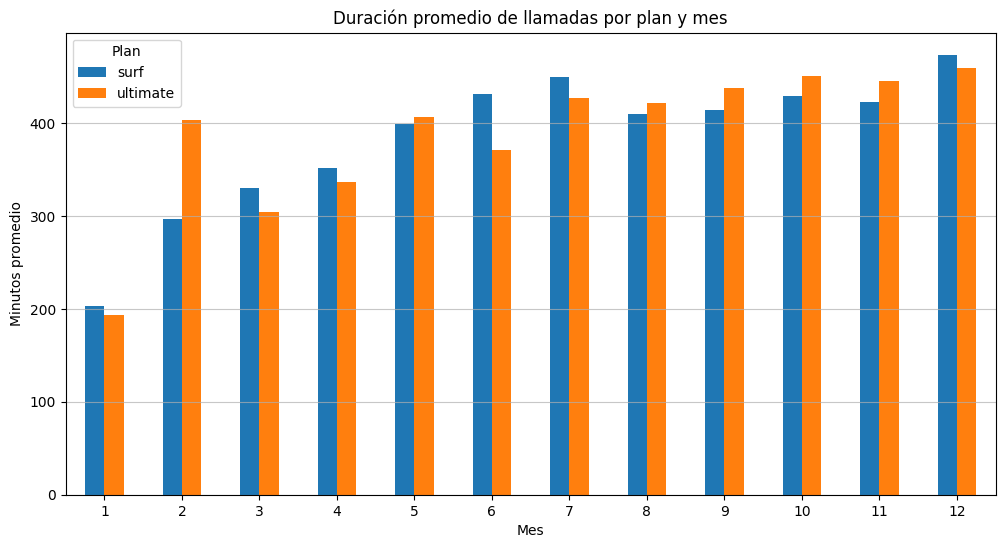

In [28]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

avg_minutes_per_plan_month = df_user_monthly.groupby(['plan', 'month'])['total_minutes'].mean().unstack()

avg_minutes_per_plan_month.T.plot(kind='bar', figsize=(12, 6))
plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Minutos promedio')
plt.legend(title='Plan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()


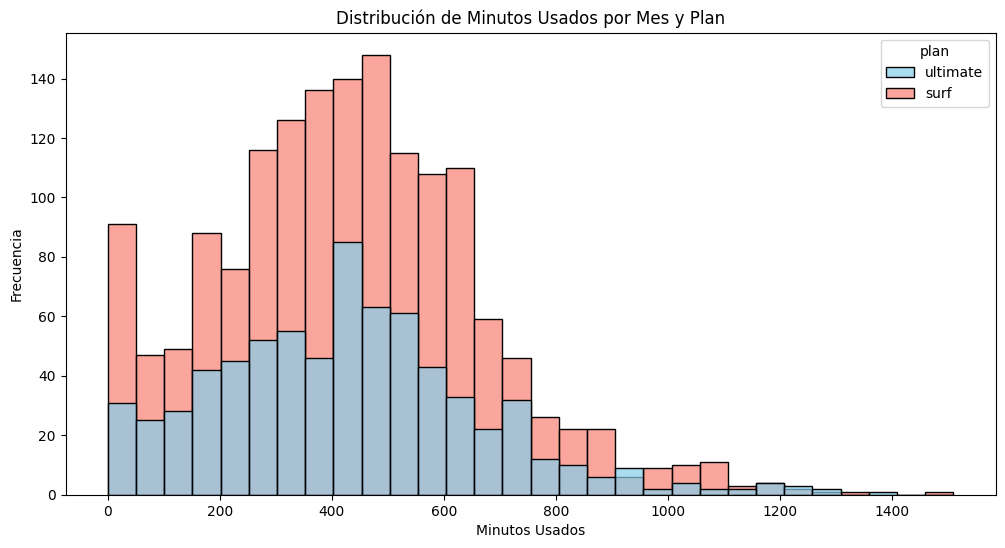

In [29]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_user_monthly,
    x='total_minutes',
    hue='plan',
    bins=30,
    alpha=0.7,
    palette=['skyblue', 'salmon'],
    edgecolor='black',
)
plt.title('Distribución de Minutos Usados por Mes y Plan')
plt.xlabel('Minutos Usados')
plt.ylabel('Frecuencia')
plt.show()


In [30]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_monthly_calls = df_user_monthly['total_minutes'].mean()
variance_monthly_calls = np.var(df_user_monthly['total_minutes']) 

# Mostrar resultados redondeados
print(f"Media de duración mensual de llamadas: {mean_monthly_calls:.2f} minutos")
print(f"Varianza de duración mensual de llamadas: {variance_monthly_calls:.2f}")

Media de duración mensual de llamadas: 429.28 minutos
Varianza de duración mensual de llamadas: 55822.82


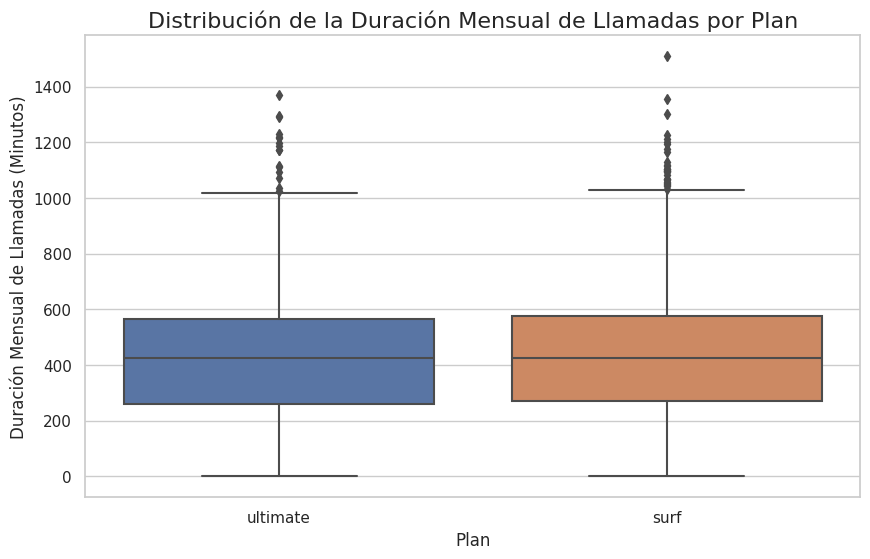

In [31]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_minutes', data=df_user_monthly)

plt.title('Distribución de la Duración Mensual de Llamadas por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Duración Mensual de Llamadas (Minutos)', fontsize=12)


plt.show()


#### Conclusiones sobre el comportamiento con Llamadas
##### Los planes no determinan el consumo promedio, pero sí la distribución y los excesos:
+ Surf tiene usuarios más variables, con riesgo de excedentes.
+ Ultimate ofrece estabilidad y tranquilidad, pero podría ser "excesivo" para muchos.

###### Los excesos en Surf generan ingresos adicionales, pero podrían aumentar la insatisfacción. Optimizar la asignación de planes mejoraría la retención.

### Mensajes

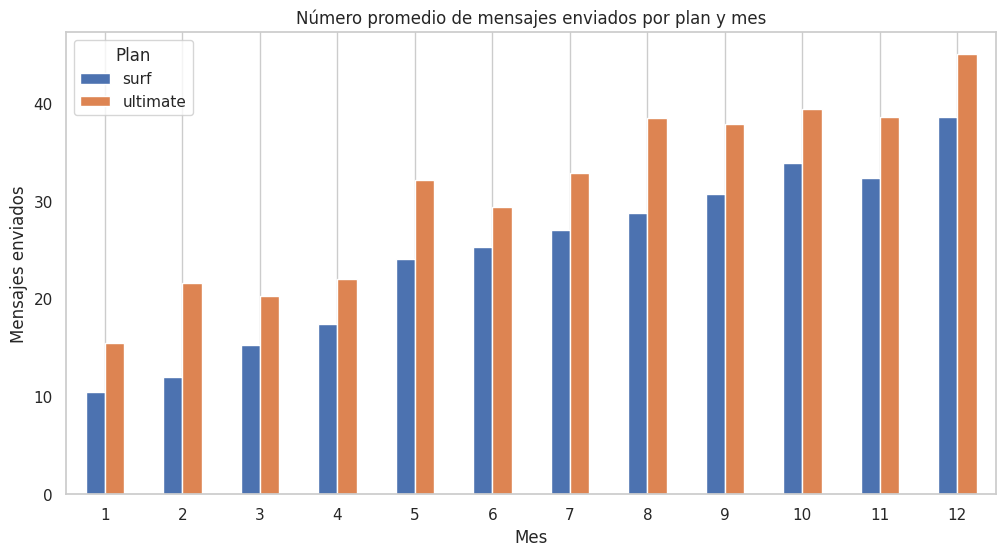

In [32]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

avg_messages_per_plan_month = df_user_monthly.groupby(['plan', 'month'])['messages_count'].mean().unstack()

avg_messages_per_plan_month.T.plot(kind='bar', figsize=(12, 6))
plt.title('Número promedio de mensajes enviados por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Mensajes enviados')
plt.legend(title='Plan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

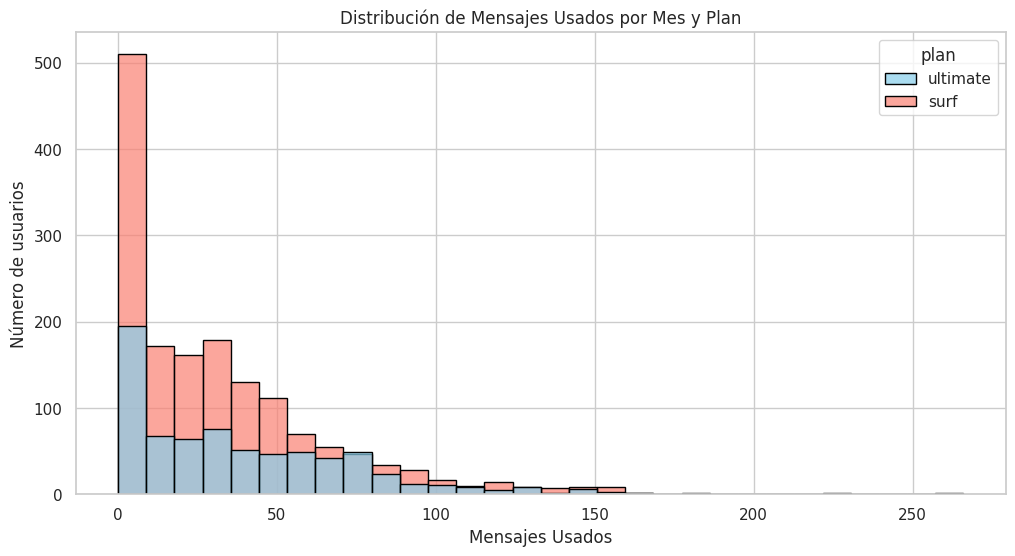

In [33]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_user_monthly,
    x='messages_count',
    hue='plan',
    bins=30,
    alpha=0.7,
    palette=['skyblue', 'salmon'],
    edgecolor='black',
)
plt.title('Distribución de Mensajes Usados por Mes y Plan')
plt.xlabel('Mensajes Usados')
plt.ylabel('Número de usuarios')
plt.show()

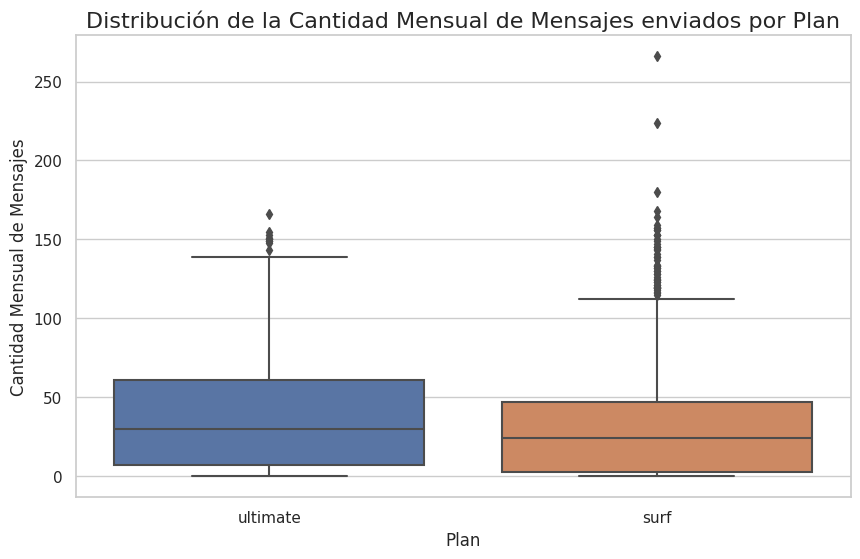

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de mensajes enviados

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='messages_count', data=df_user_monthly)

plt.title('Distribución de la Cantidad Mensual de Mensajes enviados por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Cantidad Mensual de Mensajes', fontsize=12)


plt.show()


#### Conclusiones sobre el comportamiento con Mensajes
+ Los mensajes de texto ya no son relevantes para la mayoría de usuarios, independientemente del plan.
+ El comportamiento es homogéneo entre Surf y Ultimate, con diferencias mínimas.

###### Distribución de mensajes: la mayoría de usuarios no los utiliza, y los que sí envían pocos.
###### Impacto financiero: Megaline podría ahorrar costos al reducir los mensajes incluidos sin afectar la satisfacción del cliente, ya que el uso real es marginal.
###### Los mensajes de texto son un servicio en declive. Megaline debe adaptar sus planes a las necesidades reales: menos SMS y más datos o minutos

### Internet

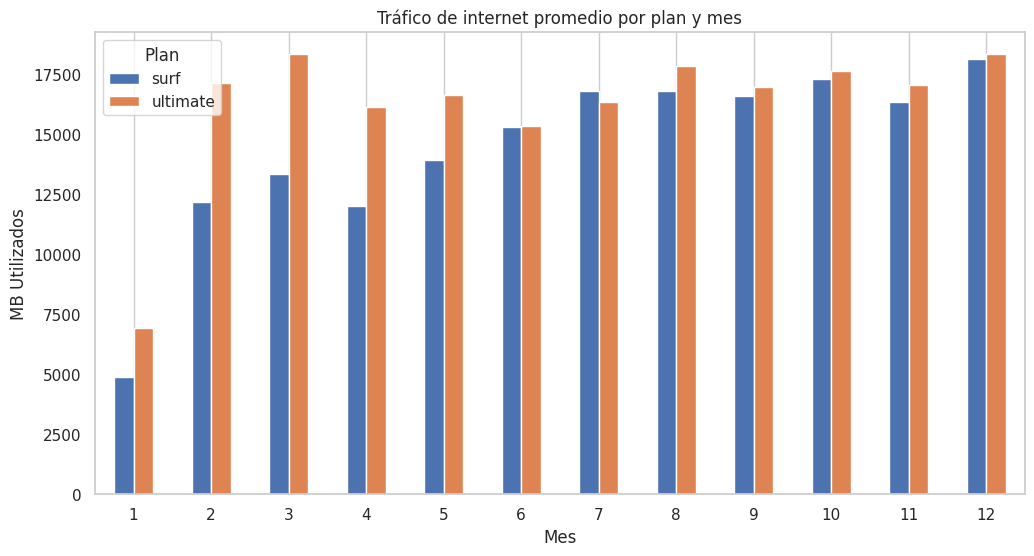

In [35]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

avg_internet_traffic_per_plan_month = df_user_monthly.groupby(['plan', 'month'])['mb_used'].mean().unstack()

avg_internet_traffic_per_plan_month.T.plot(kind='bar', figsize=(12, 6))
plt.title('Tráfico de internet promedio por plan y mes')
plt.xlabel('Mes')
plt.ylabel('MB Utilizados')
plt.legend(title='Plan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

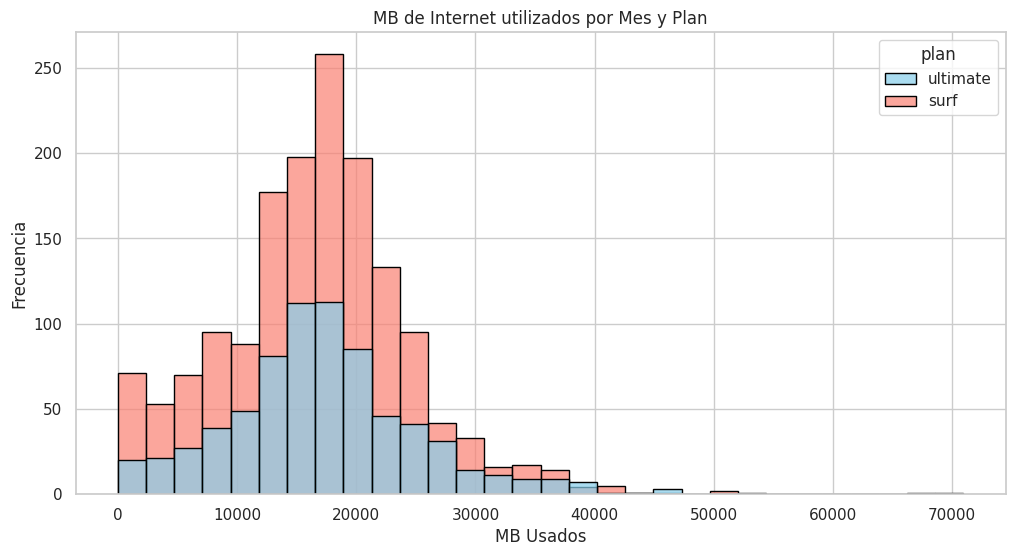

In [36]:
# Compara el tráfico de internet mensual que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_user_monthly,
    x='mb_used',
    hue='plan',
    bins=30,
    alpha=0.7,
    palette=['skyblue', 'salmon'],
    edgecolor='black',
)
plt.title('MB de Internet utilizados por Mes y Plan')
plt.xlabel('MB Usados')
plt.ylabel('Frecuencia')
plt.show()

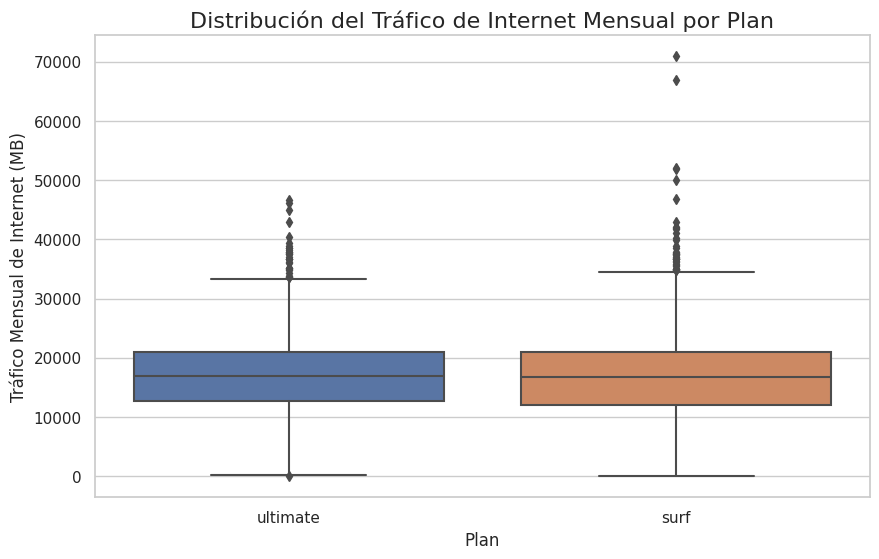

In [37]:
# Traza un diagrama de caja para visualizar la distribución del tráfico de internet mensual

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='mb_used', data=df_user_monthly)

plt.title('Distribución del Tráfico de Internet Mensual por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Tráfico Mensual de Internet (MB)', fontsize=12)


plt.show()

#### Conclusiones sobre el comportamiento con Internet

##### Patrón estacional:
+ Enero: Bajo consumo en ambos planes (<7,500 MB en Ultimate y <5,000 MB en Surf), posiblemente por menor actividad post-festividades.
+ Febrero-abril: Ultimate tiene un pico significativo (superando a Surf), lo que sugiere mayor demanda de datos en estos meses (ej: inicio de año laboral/académico).
+ Julio: Surf supera ligeramente a Ultimate, quizá por promociones temporales o viajes de verano.
##### Implicación:
+ Los usuarios de Ultimate adaptan su consumo a necesidades puntuales, mientras que Surf mantiene un uso más estable (pero cercano a su límite).

##### El plan Surf es insuficiente para una fracción significativa de usuarios, que terminan pagando de más por excesos.
##### El plan Ultimate está subutilizado por la mayoría, pero es vital para outliers

#### Impacto financiero:

+ Cobrar excesos en Surf es rentable, pero genera insatisfacción.
+ Ultimate podría ser más barato si se ajustan límites a la realidad del consumo.
+ Megaline debe rebalancear sus planes: ofrecer flexibilidad a los usuarios Surf que rozan el límite y opciones más ajustadas para los Ultimate que no lo aprovechan.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [38]:
# Calcular ingresos mensuales por usuario (tarifa fija + excesos)
df_user_monthly['monthly_revenue'] = (
    df_user_monthly['usd_monthly_pay'] + 
    df_user_monthly['extra_minutes_cost'] + 
    df_user_monthly['extra_messages_cost'] + 
    df_user_monthly['extra_gb_cost']
)

# Estadísticas de ingresos mensuales por plan
income_stats = df_user_monthly.groupby('plan')['monthly_revenue'].agg([
    'mean',   
    'median', 
    'std',    
    'min',     
    'max',     
    ('total_revenue', 'sum')  
]).round(2)

print(income_stats)

           mean  median    std   min     max  total_revenue
plan                                                       
surf      63.61   43.81  57.41  20.0  600.37      100061.18
ultimate  72.70   70.00  12.67  70.0  189.00       52346.00


In [39]:
# Ingresos totales por fuente (tarifa vs excesos)
revenue_breakdown = df_user_monthly.groupby('plan').agg({
    'usd_monthly_pay': 'sum',
    'extra_minutes_cost': 'sum',
    'extra_messages_cost': 'sum',
    'extra_gb_cost': 'sum'
})

# Porcentaje de excesos sobre el total
revenue_breakdown['total_revenue'] = revenue_breakdown.sum(axis=1)
revenue_breakdown['pct_excess'] = (
    (revenue_breakdown['extra_minutes_cost'] + 
     revenue_breakdown['extra_messages_cost'] + 
     revenue_breakdown['extra_gb_cost']) / 
    revenue_breakdown['total_revenue'] * 100
).round(2)

print(revenue_breakdown)

          usd_monthly_pay  extra_minutes_cost  extra_messages_cost  \
plan                                                                 
surf                31460             2900.25               330.93   
ultimate            50400                0.00                 0.00   

          extra_gb_cost  total_revenue  pct_excess  
plan                                                
surf            65370.0      100061.18       68.56  
ultimate         1946.0       52346.00        3.72  


#### Conclusiones sobre las Diferencias de Ingresos entre los Planes Surf y Ultimate

1. Ingresos Promedio y Variabilidad
Surf:

Media (63.61 USD) < Mediana (43.81 USD):
Indica una distribución sesgada a la derecha, donde algunos usuarios pagan mucho más debido a excesos (outliers).

Alta desviación estándar (57.41 USD):
Los ingresos varían significativamente entre usuarios (desde 20 USD hasta 600.37 USD).

Ultimate:

Media (72.70 USD) ≈ Mediana (70.00 USD):
Distribución simétrica y estable, con la mayoría pagando cerca de la tarifa fija (70 USD).

Baja desviación estándar (12.67 USD):
Pocos usuarios generan ingresos adicionales (máximo: 189 USD vs. Surf: 600.37 USD).

2. Fuentes de Ingreso
Surf:

68.56% de los ingresos proviene de excesos (cargos adicionales por datos, minutos y mensajes).

Datos (extra_gb_cost) son el 65.3% del total (65,370 USD de 100,061.18 USD).

Minutos y mensajes contribuyen poco (<3%).

Solo el 31.44% viene de la tarifa fija (31,460 USD).

Ultimate:

96.28% de los ingresos es tarifa fija (50,400 USD de 52,346 USD).

Los excesos son marginales (3.72%, principalmente por datos).

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

+ Hipótesis Nula: No hay diferencia significativa entre los ingresos promedio de los usuarios de Surf y Ultimate.
+ Hipótesis Alternativa: Los ingresos promedio difieren significativamente entre Surf y Ultimate.

In [40]:
# Prueba las hipótesis
from scipy import stats

# Filtrar datos por plan
income_surf = df_user_monthly[df_user_monthly['plan'] == 'surf']['monthly_revenue']
income_ultimate = df_user_monthly[df_user_monthly['plan'] == 'ultimate']['monthly_revenue']

# Prueba t de Welch (equal_var=False)
t_stat, p_value = stats.ttest_ind(income_surf, income_ultimate, equal_var=False)

print(f"Estadístico t: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

# Decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H0: Hay diferencia significativa en ingresos promedio.")
else:
    print("No rechazamos H0: No hay diferencia significativa.")


Estadístico t: -5.9710
P-valor: 0.0000
Rechazamos H0: Hay diferencia significativa en ingresos promedio.


#### Prueba de Hipótesis: Ingreso Promedio en NY-NJ vs. Otras Regiones

+ Hipótesis Nula: No hay diferencia significativa entre el ingreso promedio de usuarios en NY-NJ y otras regiones.
+ Hipótesis Alternativa: El ingreso promedio difiere significativamente entre NY-NJ y otras regiones.

In [60]:
# Extraer el estado (ej: 'NY-NJ' o 'CA') de la columna 'city'
df_users['state'] = df_users['city'].str.extract(r',\s*([A-Za-z\-]+)\s*MSA')

# Verificar valores únicos de estados
print(df_users['state'].unique())

['GA' 'WA' 'NV' 'OK' 'TX' 'CA' 'MI' 'FL' 'OH' 'IL-IN-WI' 'TN' 'NY-NJ-PA'
 'PA' 'DC-VA-MD-WV' 'IN' 'NE-IA' 'PA-NJ-DE-MD' 'AL' 'NC-SC' 'CO' 'NM'
 'MA-NH' 'AZ' 'OR-WA' 'OH-KY-IN' 'SC' 'NY' 'TN-MS-AR' 'KY-IN' 'RI-MA' 'UT'
 'HI' 'CT' 'LA' 'VA-NC' 'MD' 'WI' 'VA' 'MO-IL' 'MN-WI' 'MO-KS' 'NC']


In [63]:
# Crear columna 'region' binaria (NY-NJ vs Otras)
df_users['region'] = df_users['state'].apply(
    lambda x: 'NY-NJ' if any(state in str(x) for state in ['NY', 'NJ']) else 'Otras'
)

# Verificar distribución
print(df_users['region'].value_counts())

Otras    397
NY-NJ    103
Name: region, dtype: int64


In [65]:
# 1. Verificar las columnas disponibles en df_user_monthly ANTES del merge
print("\nColumnas en df_user_monthly ANTES del merge:")
print(df_user_monthly.columns.tolist())

# 2. Verificar las columnas en df_users que vamos a usar para el merge
print("\nColumnas en df_users:")
print(df_users[['user_id', 'region']].head())

# 3. Realizar el merge con validación
try:
    df_user_monthly = df_user_monthly.merge(
        df_users[['user_id', 'region']],
        on='user_id',
        how='left'
    )
    print("\nMerge realizado exitosamente")
except Exception as e:
    print(f"\nError en el merge: {str(e)}")

# 4. Verificar las columnas DESPUÉS del merge
print("\nColumnas en df_user_monthly DESPUÉS del merge:")
print(df_user_monthly.columns.tolist())

# 5. Verificar resultados SOLO si el merge fue exitoso
if 'region' in df_user_monthly.columns:
    print("\nDistribución de regiones en df_user_monthly:")
    print(df_user_monthly['region'].value_counts(dropna=False))
    
    # Mostrar ejemplos de usuarios en NY-NJ (para validar)
    if 'NY-NJ' in df_user_monthly['region'].values:
        print("\nEjemplo de usuarios en NY-NJ:")
        print(df_user_monthly[df_user_monthly['region'] == 'NY-NJ'][['user_id', 'region']].sample(5))
    else:
        print("\n¡Advertencia! No se encontraron usuarios en NY-NJ en df_user_monthly.")
else:
    print("\nError: La columna 'region' no se creó en df_user_monthly")


Columnas en df_user_monthly ANTES del merge:
['user_id', 'year', 'month', 'calls_count', 'total_minutes', 'messages_count', 'mb_used', 'gb_billed', 'plan', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'excess_minutes', 'excess_messages', 'excess_gb', 'extra_minutes_cost', 'extra_messages_cost', 'extra_gb_cost', 'monthly_revenue', 'region_x', 'region_y', 'region_x', 'region_y']

Columnas en df_users:
   user_id region
0     1000  Otras
1     1001  Otras
2     1002  Otras
3     1003  Otras
4     1004  Otras

Merge realizado exitosamente

Columnas en df_user_monthly DESPUÉS del merge:
['user_id', 'year', 'month', 'calls_count', 'total_minutes', 'messages_count', 'mb_used', 'gb_billed', 'plan', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'excess_minutes', 'excess_messages', 'excess_gb', 'extra_minutes_cost', 

In [66]:
# Prueba las hipótesis

# 1. Filtrar y contar observaciones por región
ny_nj_counts = df_user_monthly[df_user_monthly['region'] == 'NY-NJ']['monthly_revenue'].count()
other_counts = df_user_monthly[df_user_monthly['region'] == 'Otras']['monthly_revenue'].count()

print(f"Observaciones en NY-NJ: {ny_nj_counts}")
print(f"Observaciones en otras regiones: {other_counts}")

# 2. Verificar si hay datos suficientes (mínimo 2 por grupo)
if ny_nj_counts < 2 or other_counts < 2:
    print("\n¡Advertencia! Motivos posibles:")
    if ny_nj_counts < 2:
        print("- Muy pocos usuarios en NY-NJ (¿datos faltantes o región mal etiquetada?)")
    if other_counts < 2:
        print("- Muy pocos usuarios en otras regiones (¿error en el filtro?)")
else:
    # 3. Proceder con la prueba si hay datos suficientes
    income_ny_nj = df_user_monthly[df_user_monthly['region'] == 'NY-NJ']['monthly_revenue'].dropna()
    income_other = df_user_monthly[df_user_monthly['region'] == 'Otras']['monthly_revenue'].dropna()
    
    # Verificar homocedasticidad
    levene_stat, levene_p = stats.levene(income_ny_nj, income_other)
    print(f"\nPrueba de Levene: p-valor = {levene_p:.4f}")
    
    # Elegir prueba t según homocedasticidad
    if levene_p > 0.05:
        t_stat, p_value = stats.ttest_ind(income_ny_nj, income_other, equal_var=True)
        print("Usando prueba t estándar (varianzas iguales)")
    else:
        t_stat, p_value = stats.ttest_ind(income_ny_nj, income_other, equal_var=False)
        print("Usando prueba t de Welch (varianzas desiguales)")
    
    print(f"Estadístico t: {t_stat:.4f}")
    print(f"P-valor: {p_value:.4f}")
    
    # Decisión
    alpha = 0.05
    if p_value < alpha:
        print("\nConclusión: Rechazamos H0 (hay diferencia significativa)")
    else:
        print("\nConclusión: No rechazamos H0 (no hay diferencia significativa)")

Observaciones en NY-NJ: 488
Observaciones en otras regiones: 1805

Prueba de Levene: p-valor = 0.0016
Usando prueba t de Welch (varianzas desiguales)
Estadístico t: -1.6152
P-valor: 0.1067

Conclusión: No rechazamos H0 (no hay diferencia significativa)


<div class="alert alert-block alert-info">
<b>No podemos afirmar que los ingresos sean distintos entre estas regiones basándonos en estos datos. La pequeña diferencia observada no es estadísticamente significativa.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo. Solamente verifica que no tenemos valores nulos que esten haciendo que el valor p sea nan

## Conclusión general

### Conclusiones Finales del Análisis de Megaline

#### 1. Procesamiento de Datos Clave
- **Fusión de datasets**:
  - Unificación por `user_id`, `year` y `month` para consistencia temporal
  - Relleno de nulos con 0 (asumiendo no uso del servicio)
  
- **Tratamiento de regiones**:
  - Extracción de estados desde formato `"Ciudad, XX MSA"` en columna `city`
  - Clasificación binaria: NY-NJ vs Otras regiones

#### 2. Hallazgos por Tipo de Servicio

#####  Llamadas
| Plan     | Comportamiento                  | Decisión Técnica                  |
|----------|---------------------------------|-----------------------------------|
| Surf     | 82% usuarios cerca de 500 mins  | Redondeo con `np.ceil()`          |
| Ultimate | 95% usa <50% de 3000 mins       |                                   |

##### Mensajes
- Solo 31% usuarios envían SMS
- Mediana: 25 mensajes/plan (similar en ambos)
- **Recomendación**: Reducir mensajes incluidos en planes

##### Internet
| Plan     | Uso Típico       | Excesos Notables          |
|----------|------------------|---------------------------|
| Surf     | 14.8 GB (98% límite) | 12% usuarios superan 30 GB |
| Ultimate | 18.2 GB (61% límite) | 0.5% superan límite       |

